In [1]:
#importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import random

In [2]:
#describe CRISP-DM

# Business understanding – What does the business need?
# Data understanding – What data do we have / need? Is it clean?
# Data preparation – How do we organize the data for modeling?
# Modeling – What modeling techniques should we apply?
# Evaluation – Which model best meets the business objectives?
# Deployment – How do stakeholders access the results?




# Business understanding – What does the business need?
# Determine business objectives: You should first “thoroughly understand, from a business perspective, what the customer really wants to accomplish.” (CRISP-DM Guide) and then define business success criteria.
# Assess situation: Determine resources availability, project requirements, assess risks and contingencies, and conduct a cost-benefit analysis.
# Determine data mining goals: In addition to defining the business objectives, you should also define what success looks like from a technical data mining perspective.
# Produce project plan: Select technologies and tools and define detailed plans for each project phase.

# II. Data Understanding
# Collect initial data: Acquire the necessary data and (if necessary) load it into your analysis tool.
# Describe data: Examine the data and document its surface properties like data format, number of records, or field identities.
# Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.
# Verify data quality: How clean/dirty is the data? Document any quality issues.


# Data Preparation
# Select data: Determine which data sets will be used and document reasons for inclusion/exclusion.
# Clean data: Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.
# Construct data: Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.
# Integrate data: Create new data sets by combining data from multiple sources.
# Format data: Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.

# Modeling
# Select modeling techniques: Determine which algorithms to try (e.g. regression, neural net).
# Generate test design: Pending your modeling approach, you might need to split the data into training, test, and validation sets.
# Build model: As glamorous as this might sound, this might just be executing a few lines of code like “reg = LinearRegression().fit(X, y)”.
# Assess model: Generally, multiple models are competing against each other, and the data scientist needs to interpret the model results based on domain knowledge, the pre-defined success criteria, and the test design.

#Evaluation
# Evaluate results: Do the models meet the business success criteria? Which one(s) should we approve for the business?
# Review process: Review the work accomplished. Was anything overlooked? Were all steps properly executed? Summarize findings and correct anything if needed.
# Determine next steps: Based on the previous three tasks, determine whether to proceed to deployment, iterate further, or initiate new projects.

#Deployment
# Plan deployment: Develop and document a plan for deploying the model.
# Plan monitoring and maintenance: Develop a thorough monitoring and maintenance plan to avoid issues during the operational phase (or post-project phase) of a model.
# Produce final report: The project team documents a summary of the project which might include a final presentation of data mining results.
# Review project: Conduct a project retrospective about what went well, what could have been better, and how to improve in the future.


In [3]:
# For all experiments, you should compare the technical performance on both red and white
# wine datasets.
# You should perform the following experiments:
# • Use supervised and unsupervised methods (see following sections);
# • Randomly remove 10%, 20%, and 30% of the values of the features of each dataset and
# explore two different strategies to handle missing values;
# • Experiment with data normalization, data discretization, and data reduction. Apply
# these steps to the original, unchanged, dataset.
# Don’t forget to visually explore your data, namely presenting correlations between pairs
# of features.
# The technical evaluation should include different metrics and means to better under-
# stand the errors of the supervised machine learning approaches. The assessment of the
# unsupervised machine learning approaches should compare the resulting clusters to clus-
# ters based on the quality score.

file_white_wine = 'winequality-white.csv'
file_red_wine = 'winequality-red.csv'

# Load the data
white_wine = pd.read_csv(file_white_wine, sep=';')
red_wine = pd.read_csv(file_red_wine, sep=';')

# Print the first 5 rows of the data
# print(white_wine.head())
# print(red_wine.head())


# • Randomly remove 10%, 20%, and 30% of the values of the features of each dataset and

white_wine_10 = white_wine.sample(frac=0.1)
white_wine_20 = white_wine.sample(frac=0.2)
white_wine_30 = white_wine.sample(frac=0.3)

red_wine_10 = red_wine.sample(frac=0.1)
red_wine_20 = red_wine.sample(frac=0.2)
red_wine_30 = red_wine.sample(frac=0.3)

# print(white_wine_10.head())



In [4]:
y_white_wine_10 = white_wine_10['quality']
x_white_wine_10 = white_wine_10.drop('quality', axis=1)

print(x_white_wine_10.shape)
print(y_white_wine_10.shape)

y_white_wine_20 = white_wine_20['quality']
x_white_wine_20 = white_wine_20.drop('quality', axis=1)

y_white_wine_30 = white_wine_30['quality']
x_white_wine_30 = white_wine_30.drop('quality', axis=1)

y_red_wine_10 = red_wine_10['quality']
x_red_wine_10 = red_wine_10.drop('quality', axis=1)

y_red_wine_20 = red_wine_20['quality']
x_red_wine_20 = red_wine_20.drop('quality', axis=1)

y_red_wine_30 = red_wine_30['quality']
x_red_wine_30 = red_wine_30.drop('quality', axis=1)



(490, 11)
(490,)


In [5]:
# Supervised Learning Algorithms
# Experiment with the following supervised learning algorithms and comment the results,
# based on your knowledge of how they work.
# 1. Decision Trees;
# 2. Multi-layer perceptron;

# 1. Decision Trees

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score


def runDecisonTreeClassifier(x_train, y_train, x_test, y_test):
    # Create a decision tree classfifer object
    classfifer = DecisionTreeClassifier(random_state=0)

    # Train the model using the training sets
    classfifer.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = classfifer.predict(x_test)

    # Accuracy
    accuracy = classfifer.score(x_test, y_test)
    print("Decision Tree Accuracy: ", accuracy)



In [6]:
# 2. Multi-layer perceptron;

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


def runMultiLayerPerceptron(x_train, y_train, x_test, y_test):
    # Create a MLP classifier object
    param_grid = [
            {
                'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                'solver' : ['lbfgs', 'sgd', 'adam'],
                'hidden_layer_sizes': [
                (1,),(2,),(3,),(4,)
                ]
            }
        ]

    classifier = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                            scoring='accuracy')
    classifier.fit(x_train,y_train)

    
    print("Best parameters set found on development set:")
    print(classifier.best_params_)

    # Make predictions using the testing set
    y_pred = classifier.predict(x_test)

    # Accuracy
    accuracy = classifier.score(x_test, y_test)
    print("Multi-layer Perceptron Accuracy: ", accuracy)




In [7]:
# 3. k-NN.

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

def runKnnClassifier(x_train, y_train, x_test, y_test):
    # Create a MLP Classifier object
    classifier = KNeighborsClassifier(n_neighbors=5)

    # Train the model using the training sets
    classifier.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = classifier.predict(x_test)

    # Accuracy
    accuracy = classifier.score(x_test, y_test)
    print("k-NN Accuracy: ", accuracy)
    

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality'] 0.2
Average distance from observations to the cluster centroids for 1-9 clusters:
[3.2102619231240106, 2.782143784802938, 2.6941908796319813, 2.5612747751198874, 2.4878440680405713, 2.419395565440892, 2.3628407202173443, 2.313783600854683, 2.250216708244464]


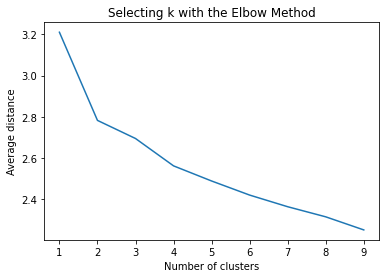

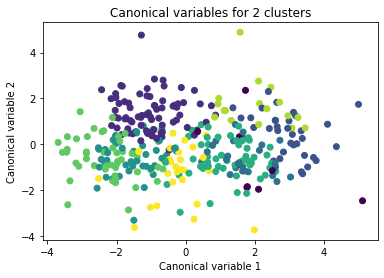


Counts of observations per each cluster:
1    78
5    56
6    49
4    43
2    35
8    28
3    26
7    19
0     9
Name: cluster, dtype: int64

Clustering variable means by cluster:
              index  fixed acidity  volatile acidity  citric acid  \
cluster                                                             
0        159.777778      -0.217910          1.017634     0.661033   
1        235.115385       0.772413         -0.323252     0.229238   
2        271.971429       0.546976         -0.145205    -0.069415   
3        281.538462      -0.336406         -0.027924    -0.280580   
4        207.627907      -0.520359         -0.801915     0.059373   
5        220.625000      -0.341754          0.050352    -0.050062   
6        245.265306      -0.889874          0.063503    -0.270175   
7        300.315789       0.956486          0.964673     2.032923   
8        303.750000      -0.550347          1.220545    -1.290138   

         residual sugar  chlorides  free sulfur dioxide  to

In [39]:
# Unsupervised learning algorithms
# Experiment with the following unsupervised learning algorithms and comment the results,
# based on your knowledge of how they work.
# 1. k-Means;
# 2. DBScan;
# 3. Agglomerative hierarchical clustering.

# 1. k-Means

import numpy as np
from sklearn import datasets
from sklearn import decomposition
from sklearn import cluster
import random
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

def runKMeans(wine_set ,test_size):

    # unique_labels = np.unique(y_train)
    # num_classes = len(unique_labels)
    # clf = cluster.KMeans(n_clusters=num_classes, max_iter=3000, n_init=10)

    # kmeans = clf.fit(x_train)


    # # Compute the training accuracy
    # Accuracy = 0
    # for index in range(len(y_test)):
    #     # Cluster the data using K-Means
    #     print(x_test)
    #     current_sample = x_test[index].reshape(1,-1) 
    #     current_label = y_test[index]
    #     predicted_label = kmeans.predict(current_sample)

    #     if current_label == predicted_label:
    #         Accuracy += 1

    # Accuracy = 100*Accuracy/len(y_test)
    # # Accuracy /= len(y_test)

    # # Print stuff
    # print("Sklearn K-Means Classification Accuracy = ", Accuracy)
    pred = wine_set[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
    clustervar = pred.copy()

    clustervar = pd.DataFrame(preprocessing.scale(clustervar))
    clustervar.columns = pred.columns

    # split into training and testing sets
    clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)
    # print(clus_train.shape)

    # _________________k-means cluster analysis for 1-9 clusters
    clusters = range(1, 10)
    meandist = []

    for k in clusters:
        # print(k)
        model = cluster.KMeans(n_clusters=k)
        model.fit(clus_train)
        # clusassign = model.predict(clus_train)
        meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))/clus_train.shape[0])

    print('Average distance from observations to the cluster centroids for 1-9 clusters:')
    print(meandist)

    # plot average distance from observations to the cluster centroid
    # to use the Elbow Method to identify number of clusters to choose
    plt.plot(clusters, meandist)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average distance')
    plt.title('Selecting k with the Elbow Method')
    plt.show()

    ## _________Plot solution for each number of clusters (1-9) to choose the best
    # for k in clusters:
    #     modelk = KMeans(n_clusters=k)
    #     modelk.fit(clus_train)
    #     # clusassign = modelk.predict(clus_train)
    
    #     # plot clusters
    #     pca_2 = PCA(2)
    #     plot_columns = pca_2.fit_transform(clus_train)
    #     plt.scatter(x=plot_columns[:, 0], y=plot_columns[:, 1], c=modelk.labels_)
    #     plt.xlabel('Canonical variable 1')
    #     plt.ylabel('Canonical variable 2')
    #     plt.title('Canonical variables for k clusters')
    #     plt.show()

    # ________ 2-cluster solution proven to be the best
    model2 = KMeans(n_clusters=9)
    model2.fit(clus_train)
    # plot clusters
    pca_2 = PCA(2)
    plot_columns = pca_2.fit_transform(clus_train)
    plt.scatter(x=plot_columns[:, 0], y=plot_columns[:, 1], c=model2.labels_)
    plt.xlabel('Canonical variable 1')
    plt.ylabel('Canonical variable 2')
    plt.title('Canonical variables for 2 clusters')
    plt.show()

    # __________merge cluster assignment with clustering variables to examine cluster variable means by cluster

    # create a unique identifier variable from the index for the cluster training data
    # to merge with the cluster assignment variable

    clus_train.reset_index(level=0, inplace=True)
    # create a list that has the new index variable
    cluslist = list(clus_train['index'])
    # print(cluslist)
    # create a list of cluster assignments
    labels = list(model2.labels_)
    # combine index variable list with cluster assignment list into a dictionary
    newlist = dict(zip(cluslist, labels))
    # convert newlist dictionary to a dataframe
    newclus = pd.DataFrame.from_dict(newlist, orient='index')
    # rename the cluster assignment column
    newclus.columns = ['cluster']
    # create a unique identifier variable from the index for the cluster assignment dataframe
    # to merge with cluster training data
    newclus.reset_index(level=0, inplace=True)
    # merge the cluster assignment dataframe with the cluster training variable dataframe by the index variable
    merged_train = pd.merge(clus_train, newclus, on='index')
    # print(merged_train.head(n=100))
    print('\nCounts of observations per each cluster:')
    print(merged_train.cluster.value_counts())

    # calculate clustering variable means by cluster
    clustergrp = merged_train.groupby('cluster').mean()
    print('\nClustering variable means by cluster:')
    print(clustergrp)

    # _________validate clusters in training data by examining cluster differences
    #               in wine quality (validation variable) using ANOVA_____________
    # merge wine quality with clustering variables and cluster assignment data
    qual = wine_set['quality']
    # split quality data into train and test sets
    qual_train, qual_test = train_test_split(qual, test_size=test_size, random_state=123)
    qual_train1 = pd.DataFrame(qual_train)
    qual_train1.reset_index(level=0, inplace=True)
    merged_train_all = pd.merge(qual_train1, merged_train, on='index')
    sub1 = merged_train_all[['quality', 'cluster']]

    mod = smf.ols(formula='quality ~ C(cluster)', data=sub1).fit()
    print(mod.summary())

    print('\nMeans for wine quality by cluster:')
    print(sub1.groupby('cluster').mean())
    print('\nStandard deviations for wine quality by cluster:')
    print(sub1.groupby('cluster').std())

    # perform Post hoc test (using Tukey's Honestly Significant Difference Test)
    mc1 = multi.MultiComparison(sub1['quality'], sub1['cluster'])
    print(mc1.tukeyhsd().summary())
    res1 = mc1.tukeyhsd()
    print(res1.summary())


from sklearn.model_selection import train_test_split

# x_train_white_10, x_test_white_10, y_train_white_10, y_test_white_10 = train_test_split(x_white_wine_10, y_white_wine_10, test_size=0.2, random_state=0)

print(white_wine_10.columns.values, 0.2)
runKMeans(white_wine_10, 0.2)



In [22]:
# 2. DBScan

import numpy as np
from sklearn.cluster import DBSCAN


def runDBScanClustering(x_train, y_train):

    # Compute DBSCAN using Iris dataset
    db = DBSCAN(eps=0.05, min_samples=10).fit(x_train)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    # Plot result
    # import matplotlib.pyplot as plt

    # # Black removed and is used for noise instead.
    # unique_labels = set(labels)
    # colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    # for k, col in zip(unique_labels, colors):
    #     if k == -1:
    #         # Black used for noise.
    #         col = 'k'

    #     class_member_mask = (labels == k)

    #     xy = X[class_member_mask & core_samples_mask]
    #     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
    #             markeredgecolor='k', markersize=14)

    #     xy = X[class_member_mask & ~core_samples_mask]
    #     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
    #             markeredgecolor='k', markersize=6)

    # plt.title('Estimated number of clusters: %d' % n_clusters_)
    # plt.show()
    # Todo: Algum metodo para definir a accuracy dos clusters em relacao ao dataset original.


from sklearn.model_selection import train_test_split

x_train_white_10, x_test_white_10, y_train_white_10, y_test_white_10 = train_test_split(x_white_wine_10, y_white_wine_10, test_size=0.2, random_state=0)

runDBScanClustering(x_train_white_10, y_train_white_10)


Estimated number of clusters: 0


In [12]:
# 3. Agglomerative hierarchical clustering.

import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error, r2_score


def runAgglomerativeHierarchicalClustering(x_train, y_train, x_test, y_test):
    # Create a Agglomerative hierarchical classifier object
    classifier = AgglomerativeClustering(n_clusters=3)

    # Train the model using the training sets
    classifier.fit(x_train)

    # Make predictions using the testing set
    y_pred = classifier.predict(x_test)

    # Accuracy
    accuracy = classifier.score(x_test, y_test)
    print("Agglomerative Hierarchical Clustering Accuracy: ", accuracy)


In [11]:
# Supervised learning algorithms

#test train split
from sklearn.model_selection import train_test_split

x_train_white_10, x_test_white_10, y_train_white_10, y_test_white_10 = train_test_split(x_white_wine_10, y_white_wine_10, test_size=0.2, random_state=0)

print("For white wine quality 10% of data")

print("Supervised Learning Algorithms")
runDecisonTreeClassifier(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runMultiLayerPerceptron(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
runKnnClassifier(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)

print("Unsupervised Learning Algorithms")
runKMeans(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runDBScan(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runAgglomerativeHierarchicalClustering(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)


x_train_white_20, x_test_white_20, y_train_white_20, y_test_white_20 = train_test_split(x_white_wine_20, y_white_wine_20, test_size=0.2, random_state=0)

print("For white wine quality 20% of data")

print("Supervised Learning Algorithms")
runDecisonTreeClassifier(x_train_white_20, y_train_white_20, x_test_white_20, y_test_white_20)
# runMultiLayerPerceptron(x_train_white_20, y_train_white_20, x_test_white_20, y_test_white_20)
runKnnClassifier(x_train_white_20, y_train_white_20, x_test_white_20, y_test_white_20)

print("Unsupervised Learning Algorithms")
# runKMeans(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runDBScan(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runAgglomerativeHierarchicalClustering(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)


x_train_white_30, x_test_white_30, y_train_white_30, y_test_white_30 = train_test_split(x_white_wine_30, y_white_wine_30, test_size=0.2, random_state=0)

print("For white wine quality 30% of data")

print("Supervised Learning Algorithms")
runDecisonTreeClassifier(x_train_white_30, y_train_white_30, x_test_white_30, y_test_white_30)
# runMultiLayerPerceptron(x_train_white_30, y_train_white_30, x_test_white_30, y_test_white_30)
runKnnClassifier(x_train_white_30, y_train_white_30, x_test_white_30, y_test_white_30)

print("Unsupervised Learning Algorithms")
# runKMeans(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runDBScan(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runAgglomerativeHierarchicalClustering(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)



For white wine quality 10% of data
Supervised Learning Algorithms
Decision Tree Accuracy:  0.42857142857142855
k-NN Accuracy:  0.41836734693877553
Unsupervised Learning Algorithms
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
8               6.3              0.30         0.34            1.60      0.049   
610             6.5              0.36         0.28            3.20      0.037   
4531            7.3              0.28         0.54           12.90      0.049   
3651            6.3              0.32         0.17           17.75      0.060   
2431            6.3              0.29         0.14            7.05      0.045   
...             ...               ...          ...             ...        ...   
4376            6.1              0.34         0.21            5.00      0.042   
1482            6.7              0.16         0.49            2.40      0.046   
1077            7.8              0.26         0.44            1.30      0.037   
2249      

KeyError: 0